In [1]:
import pandas as pd
import numpy as np
import json

df_file = "/mnt/data/factcheck/demagog/combined.ndjson"
data = []
for line in open(df_file, "r"):
    datapoint = json.loads(line)
    datapoint["parsed_text"] = ""
    for evidence in datapoint["evidence"]:
        datapoint["parsed_text"] += evidence["parsed_text"] + " "
    data.append(datapoint)
df = pd.DataFrame(data)

In [2]:
df

statement_id assessment_id  \
0            6396           902   
1            8356          2862   
2           13506          8012   
3           15840         10346   
4            8187          2693   
...           ...           ...   
1889         7415          1921   
1890        17507         12007   
1891        10250          4756   
1892        21729         16229   
1893         7454          1960   

                                      statement_content assessment_veracity  \
0     Korid, která má zadávat veřejné zakázky, stejn...        unverifiable   
1     Moderátor (Václav Moravec): Nejvyšší kontrolní...          misleading   
2     My jako strana jsme do doby skončení těch přís...        unverifiable   
3     Tak Evropská unie a vlajka Evropské unie visí ...                true   
4     Ale především v momentu, kdy především díky pa...        unverifiable   
...                                                 ...                 ...   
1889  Dosáhl jsem toho, že se dokázaly dohodnout dvě...                true   
1890  V krajských volbách jsem ze všech kandidátů do...                true   
1891  Já musím přiznat, že se ta situace výrazně zle...        unverifiable   
1892  V programovém prohlášení máme, že zavede...              untrue   
1893  Ve sněmovně jsem také spolupracovala se všemi,...                true   

         statement_excerpted_at  \
0     2012-08-31 09:49:17 +0200   
1     2013-04-19 08:33:12 +0200   
2     2016-09-17 00:59:35 +0200   
3     2017-11-30 07:40:59 +0100   
4     2013-03-11 08:40:08 +0100   
...                         ...   
1889  2012-12-12 19:35:24 +0100   
1890  2018-10-10 18:22:02 +0200   
1891  2014-02-27 14:20:00 +0100   
1892  2022-03-28 10:52:04 +0200   
1893  2012-12-14 15:12:31 +0100   

                           assessment_explanation_short  \
0                                                         
1                                                         
2                                                         
3                                                         
4                                                         
...                                                 ...   
1889                                                      
1890  Bělobrádek opravdu dostal s přehledem největší...   
1891                                                      
1892  Programové prohlášení nepočítá přímo se zavede...   
1893                                                      

                            assessment_explanation_html  \
0     <p>Daný výrok nelze jednoznačně ověřit, neboť ...   
1     <p><a href="http://www.vlada.cz/cz/clenove-vla...   
2     <p>Hodnotíme jako neověřitelné, jelikož jde o ...   
3     <p>Prezident Miloš Zeman necelý měsíc od své i...   
4     <p>Během koaličního jednání o výši daní v list...   
...                                                 ...   
1889  <p><a href="http://cs.wikipedia.org/wiki/Opozi...   
1890  <p>Poslední volby do zastupitelstva Královéhra...   
1891  <p>Nepodařilo se nám ověřit, jestli byla česká...   
1892  <p>Programové prohlášení vlády Petra Fialy val...   
1893  <p>V rodinné oblasti skutečně proběhla hlasová...   

         assessment_explanation_html_evidence_extracted  \
0     <p>Daný výrok nelze jednoznačně ověřit, neboť ...   
1     <p>Leoš Heger [0] je ministrem zdravotnictví o...   
2     <p>Hodnotíme jako neověřitelné, jelikož jde o ...   
3     <p>Prezident Miloš Zeman necelý měsíc od své i...   
4     <p>Během koaličního jednání o výši daní v list...   
...                                                 ...   
1889  <p>Opoziční smlouva [0] (neboli tzv. “Smlouva ...   
1890  <p>Poslední volby do zastupitelstva Královéhra...   
1891  <p>Nepodařilo se nám ověřit, jestli byla česká...   
1892  <p>Programové prohlášení vlády Petra Fialy val...   
1893  <p>V rodinné oblasti skutečně proběhla hlasová...   

                                               evidence statement_type  \
0     [{'idx'

<Axes: >

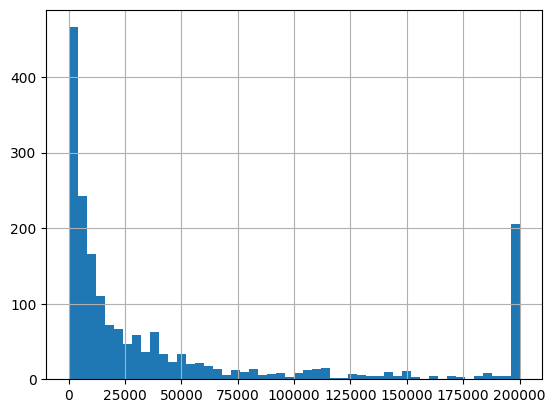

In [6]:
# show histogram of parsed_text lengths
df["parsed_text_length"] = df["parsed_text"].apply(lambda x: min(len(x), 200000))
df["parsed_text_length"].hist(bins=50)

In [8]:
df.iloc[0]["evidence"]

[{'idx': 0,
  'original_url': 'http://www.korid.cz/',
  'fetched_url': 'https://www.korid.cz/',
  'tag': '<a href="http://www.korid.cz/">webové stránky</a>',
  'content_type': 'text/html',
  'parsed_text': 'KORID LK, spol. s r.o. – Koordinátor veřejné dopravy Libereckého kraje\nSpolečnost KORID LK, spol.s.r.o., jejíž vlastníkem je Liberecký kraj, byla založena 30. března 2005 rozhodnutím zastupitelstva Libereckého kraje za účelem praktického zastupování a uskutečňování svých dopravních zájmů a zájmů svých obyvatel.\nSpolečnost se zabývá činností v oblasti integrace veřejné dopravy, zpracovává trvalou analýzu sítě veřejné dopravy a navrhuje nová koncepční řešení. Tvoří jízdní řády veřejné dopravy a změny projednává s obcemi, velkými zaměstnavateli, školami a dalšími subjekty. Zpracovává podněty ke změnám a reaguje na požadavky od občanů i institucí. Provozuje integrovaný dopravní systém IDOL, v němž spolupracuje se všemi participujícími dopravci.\nSídlo: U Jezu 642/ 2a, 461 80 Liberec\n

In [5]:
#write first 5 lines of combined.ndjson to stdout
with open(df_file, "r") as file:
    for i in range(5):
        line = file.readline()
        print(json.dumps(json.loads(line), indent=4, ensure_ascii=False))

{
    "statement_id": "6396",
    "assessment_id": "902",
    "statement_content": "Korid, která má zadávat veřejné zakázky, stejně to dává v podstatě i třetím firmám to zadávání. (Firma Korid)",
    "assessment_veracity": "unverifiable",
    "statement_excerpted_at": "2012-08-31 09:49:17 +0200",
    "assessment_explanation_short": "",
    "assessment_explanation_html": "<p>Daný výrok nelze jednoznačně ověřit, neboť <a href=\"http://www.korid.cz/\">webové stránky</a> společnosti KORID LK neuvádějí, zda firma při zadávaní veřejných zakázek využívá, či nevyužívá odborné služby jiné specializované společnosti.</p>\n<p>Tyto informace se nám nepodařilo získat ani jinou cestou.</p>\n<p>Společnost <a href=\"http://www.korid.cz/\">KORID</a> LK, spol.s.r.o., jejíž vlastníkem je Liberecký kraj, byla založena 30. března 2005 rozhodnutím zastupitelstva Libereckého kraje za účelem praktického zastupování a uskutečňování svých dopravních zájmů a zájmů svých obyvatel.</p>",
    "assessment_explanatio

In [ ]:
print("cai")